In [1]:
import numpy as np
import copy
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_olivetti_faces
import warnings

warnings.filterwarnings('ignore')

#### Implementation of the non-negative matrix factorization algorithm

In [2]:
def nnmf(V, k, max_iter):
    m, n = V.shape
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    treshold = 0.0001

    i = 0
    while i <= max_iter:
        H_previous = copy.copy(H)
        W_previous = copy.copy(W)
        numerator_H = W_previous.T.dot(V)
        denominator_H = W_previous.T.dot(W_previous)
        denominator_H = denominator_H.dot(H_previous)
        multiplier_H = numerator_H / denominator_H
        H = H_previous * multiplier_H

        numerator_W = V.dot(H.T)
        denominator_W = W_previous.dot(H)
        denominator_W = denominator_W.dot(H.T)
        multiplier_W = numerator_W / denominator_W
        W = W_previous * multiplier_W
        i += 1
    return H, W

#### Using an algorithm to display the iris dataset in a graph 2D

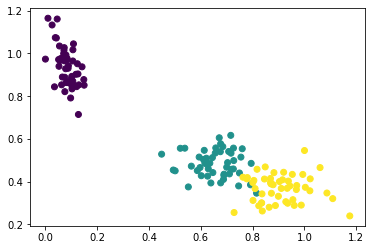

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


max_iter = 400
n_components = 2
H, W = nnmf(X, n_components, max_iter)

plt.scatter(W[:, 0], W[:, 1], c=y)
plt.show()

#### Comparison of the results obtained with the results using the PCA algorithm

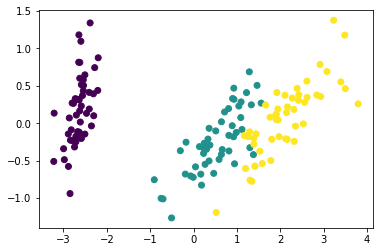

In [4]:
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y)
plt.show()

#### Comparison of the results obtained with the results using the built-in NMF algorithm (sklearn)

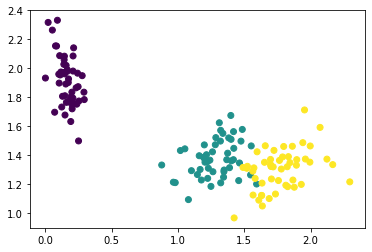

In [5]:
model = NMF(n_components=n_components, init='random', random_state=0, max_iter=max_iter)
W = model.fit_transform(X)
plt.scatter(W[:, 0], W[:, 1], c=y)
plt.show()

#### Using the NMF algorithm to decompose face images (fetch_olivetti_faces)

In [6]:
def plot_gallery(images, title):
    plt.figure()
    plt.suptitle(title)
    for i, comp in enumerate(images):
        plt.subplot(2, 3, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

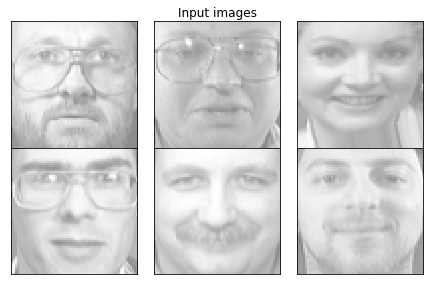

In [7]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

n_components = 6
plot_gallery(faces[:n_components], "Input images")

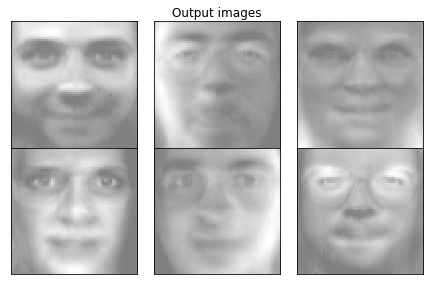

In [13]:
max_iter = 300
H, W = nnmf(faces.T, n_components, max_iter)
plot_gallery(W.T, "Output images")

#### Comparison of the results obtained with the results using the built-in NMF algorithm (sklearn)

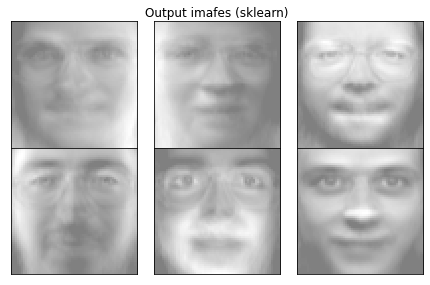

In [11]:
model = NMF(n_components=n_components, init="nndsvda", max_iter=max_iter)
model.fit(faces)
components_ = model.components_
plot_gallery(components_[:n_components], "Output imafes (sklearn)")